In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering

## UNSUPERVISED MACHINE LEARNING.

In [3]:
df = pd.read_csv("22-23_top_assist_UCL.csv")
df.head(30)

,name,team,assits,goals,played,chances_created,chances_per90,total_passes,passes_complete,passes_incomplete,pass_accuracy
0,Kevin De Bruyne,Manchester City,6,2,10,16,1.60,341,265,76,78%
1,Vinícius Júnior,Real Madrid,5,7,12,13,1.08,406,327,79,81%
2,Federico Dimarco,Inter Milan,5,0,11,11,1.00,291,220,71,76%
3,Lionel Messi,Paris Saint Germain,4,4,7,15,2.14,396,346,50,87%
4,Leon Goretzka,Bayern Munich,4,2,9,5,0.56,308,272,36,88%
5,Khvicha Kvaratskhelia,Napoli,4,2,9,13,1.44,262,201,61,77%
6,Alejandro Grimaldo,Benfica,4,2,10,15,1.50,560,477,83,85%
7,Diogo Jota,Liverpool,4,0,6,8,1.33,92,73,19,79%
8,João Cancelo,"Manchester City, Bayern Munich",4,0,10,2,0.20,455,400,55,88%
9,Kylian Mbappé,Paris Saint Germain,3,7,8,5,0.63,256,206,50,80%


In [4]:
x=df.iloc[:,[4,5]].values

In [6]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

## overall, this code ois useful for determining the optimal number of clusters for the kmeans to determine the elbow point.

## ANOTHER NAME FOR CLUSTER CLASSIFICTION IS CALLED ELBOW POINT.

C:\Users\AHMADU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AHMADU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AHMADU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AHMADU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[697.125,
 194.47552447552448,
 147.33333333333331,
 113.21666666666667,
 90.55000000000001,
 71.11666666666666,
 54.4,
 39.166666666666664,
 31.666666666666664,
 28.166666666666664]

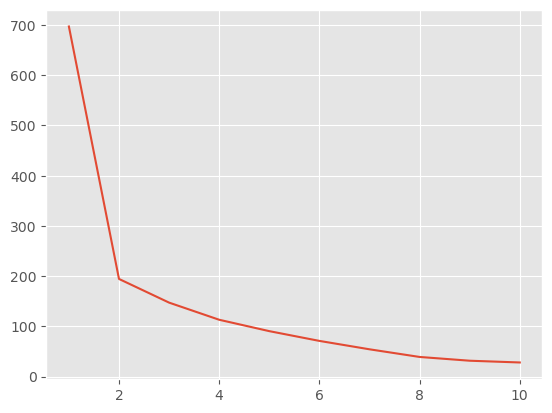

In [8]:
plt.style.use("ggplot")
plt.plot(range(1,11),wcss)

In [9]:
ymeans=KMeans(n_clusters=2)
pred=ymeans.fit_predict(x)
pred

C:\Users\AHMADU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AHMADU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1])

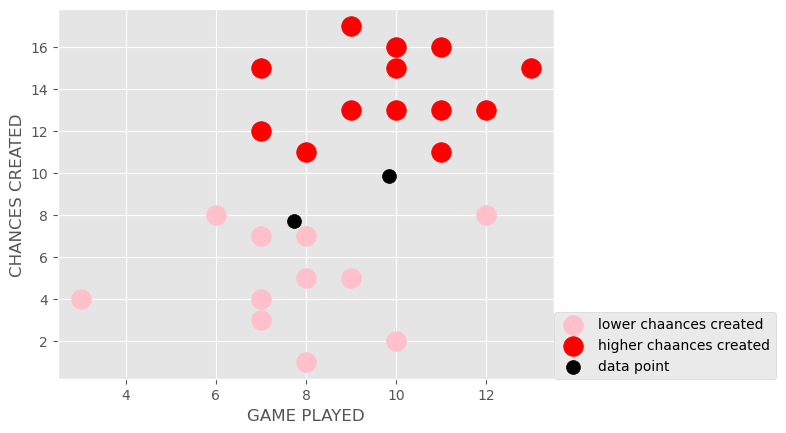

In [12]:
plt.scatter(x[pred==0,0],x[pred==0,1], c="pink", s=200, label= "lower chaances created")
plt.scatter(x[pred==1,0],x[pred==1,1], c="red", s=200, label= "higher chaances created")
plt.scatter(ymeans.cluster_centers_[:,0],ymeans.cluster_centers_[:,0], c="black", s=100, label= "data point")
plt.xlabel("GAME PLAYED")
plt.ylabel("CHANCES CREATED")
plt.legend(loc=[1,0])
plt.show()